# Exploratory analysis for first collected data

##### Importing libraries to be used and getting current file path

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.stats import zscore
import statistics

file_path = os.getcwd()

##### Defining function to get parent folder (get data)

In [2]:
def get_parent(path, number_of_folders):
    new_path = path
    for _ in range(0, number_of_folders):
        new_path = os.path.dirname(new_path)
    return(new_path)

##### Getting data path and DataFrame

In [3]:
data_path = os.path.join(get_parent(file_path, 1), 'data\\treated\\results_2024.parquet')
df = pd.read_parquet(data_path)

##### Getting rid of dirty data

In [4]:
df.pos = pd.to_numeric(df.loc[:,'pos'], errors='coerce')
df.age = pd.to_numeric(df.loc[:, 'age'], errors='coerce')
df = df.loc[df.pos.notna()]

In [5]:
df = df.loc[df.time.notna()]

##### Creating new features of time

In [6]:
df['part_time_h'] = df['time'].apply(lambda t: int(t.split(':')[0]))
df['part_time_m'] = df['time'].apply(lambda t: int(t.split(':')[1]))
df['part_time_s'] = df['time'].apply(lambda t: int(t.split(':')[2]))

df['time_s'] = df.time.apply(lambda t: int(t.split(':')[0])*3600 + int(t.split(':')[1])*60 + int(t.split(':')[2]))
df['time_m'] = df.time_s / 60
df['time_h'] = df.time_m / 60

df

,pos,num,athlete,gender,age,group,ag,c,team,time,...,part_time_m,part_time_s,total_time_s,total_time_m,total_time_h,dist_num,pace,time_s,time_m,time_h
1,1,11814,JOZELI JANIS DE CASTRO,F,42,F4044,1,,CASA DO DO\nCORREDOR,00:39:45,...,39,45,2385,39.750000,0.662500,10,00:03:58.500000,2385,39.750000,0.662500
2,2,11605,JULIANA CRISTINA DE OLIVEIRA VIEIRA,F,31,F3034,1,,,00:42:31,...,42,31,2551,42.516667,0.708611,10,00:04:15.100000,2551,42.516667,0.708611
3,3,11018,IZABELA TIAGO GERMANO,F,30,F3034,2,,,00:44:13,...,44,13,2653,44.216667,0.736944,10,00:04:25.300000,2653,44.216667,0.736944
4,4,11442,ROBERTA KELLE FERREIRA,F,33,F3034,3,,,00:44:36,...,44,36,2676,44.600000,0.743333,10,00:04:27.600000,2676,44.600000,0.743333
5,5,12274,JOSELI MARIA FERREIRA,F,37,F3539,1,,ITAUNARUNNERS,00:45:14,...,45,14,2714,45.233333,0.753889,10,00:04:31.400000,2714,45.233333,0.753889
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11345,3993,6423,MANOEL MOREIRA DO AMARAL,M,70,M7074,34,,4RUN,02:42:28,...,42,28,9748,162.466667,2.707778,5,00:32:29.600000,9748,162.466667,2.707778
11346,3994,8161,LUCIANO BRANT FERNANDES,M,47,M4549,489,,MEIAS RENEGADAS\nINDIVIDUAL,02:45:30,...,45,30,9930,165.500000,2.758333,5,00:33:06,9930,165.500000,2.758333
11347,3995,3715,THIAGO COSTA VIANA,M,37,M3539,540,,,02:46:58,...,46,58,10018,166.966667,2.782778,5,00:33:23.600000,10018,166.966667,2.782778
11348,3996,1786,DENIS ROBSON DANTAS LEMOS,M,67,M6569,67,,,02:57:19,...,57,19,10639,177.316667,2.955278,5,00:35:27.800000,10639,177.316667,2.955278


##### Creating new features of distance

In [7]:
df['dist_num'] = df.distance.str.replace('KM', '')
df.dist_num = pd.to_numeric(df.loc[:, 'dist_num'])

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11346 entries, 1 to 11349
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   pos           11346 non-null  int64  
 1   num           11346 non-null  int64  
 2   athlete       11346 non-null  object 
 3   gender        11346 non-null  object 
 4   age           11346 non-null  int64  
 5   group         11346 non-null  object 
 6   ag            11346 non-null  int64  
 7   c             11346 non-null  object 
 8   team          11346 non-null  object 
 9   time          11346 non-null  object 
 10  distance      11346 non-null  object 
 11  part_time_h   11346 non-null  int64  
 12  part_time_m   11346 non-null  int64  
 13  part_time_s   11346 non-null  int64  
 14  total_time_s  11346 non-null  int64  
 15  total_time_m  11346 non-null  float64
 16  total_time_h  11346 non-null  float64
 17  dist_num      11346 non-null  int64  
 18  pace          11346 non-null  o

##### Checking distribuition of total time

Categoria: F-10 / Média (h) 1.12 / Mediana (h) 1.09
Categoria: M-10 / Média (h) 1.00 / Mediana (h) 0.97
Categoria: F-5 / Média (h) 0.77 / Mediana (h) 0.69
Categoria: M-5 / Média (h) 0.68 / Mediana (h) 0.60


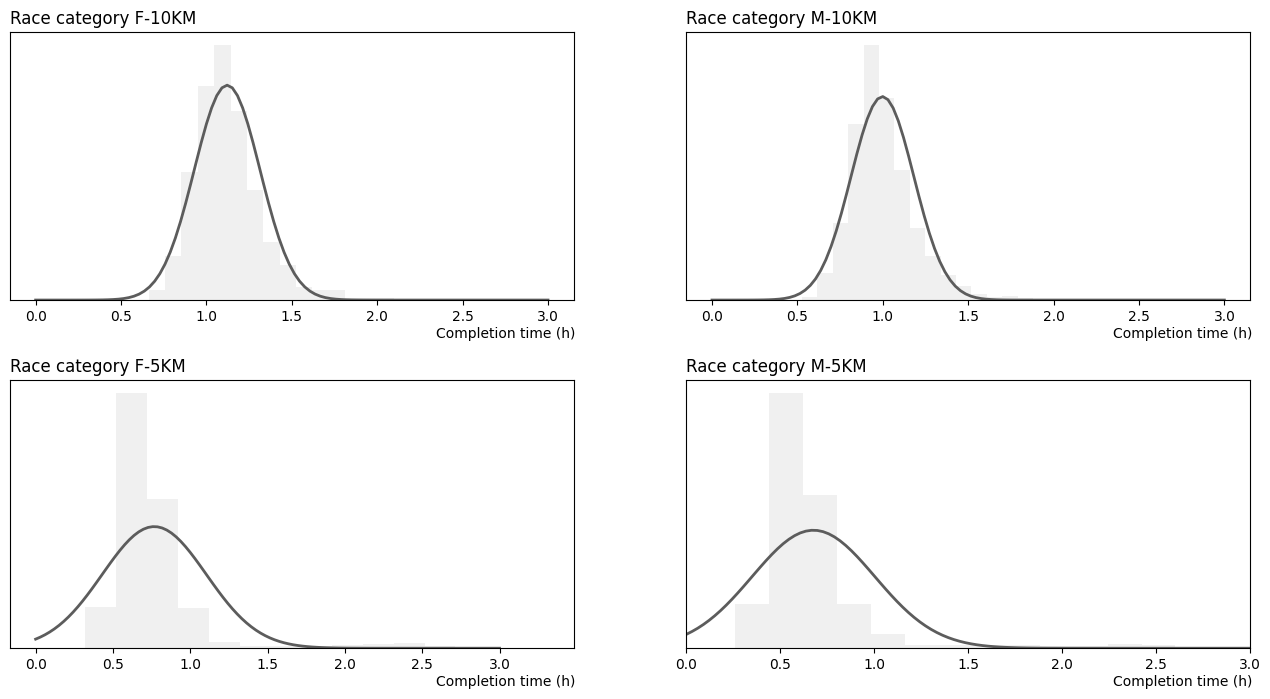

In [24]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

# Data slicers
genders = ['F', 'M', 'F', 'M']
dist_nums = [10, 10, 5, 5]

for i in range(0,4):
    
    
    # New DataFrame sliced by race
    df_br = df.loc[(df.gender == genders[i]) & (df.dist_num == dist_nums[i])]
    values = df_br.time_h.values
    print(f'Categoria: {genders[i]}-{dist_nums[i]} / Média (h) {np.mean(values):.2f} / Mediana (h) {np.median(values):.2f}')

    # Plotting histogram
    ax.flat[i].hist(values, bins=15, color='#F0F0F0', density=True)
    
    mean, std = norm.fit(values)
    xmin = 0
    xmax = 3 #values.max()
    plt.xlim(xmin, xmax)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)
    
    # Plotting normal distribuition
    ax.flat[i].plot(x, p, color='#5C5C5C', linewidth=2)
    
    ax.flat[i].set_title(f'Race category {genders[i]}-{dist_nums[i]}KM', loc='left')
    
    ax.flat[i].tick_params(axis='y', which='both', left=False, labelleft=False)
    
    ax.flat[i].set_xlabel('Completion time (h)')
    
    ax.flat[i].xaxis.set_label_coords(0.88, -0.1)
    
    plt.subplots_adjust(hspace = 0.3)

plt.show()

##### Adjusting normal distribuitions by removing outliers

Categoria: F-10 / Média (h) 1.11 / Mediana (h) 1.09
Categoria: M-10 / Média (h) 0.99 / Mediana (h) 0.97
Categoria: F-5 / Média (h) 0.71 / Mediana (h) 0.68
Categoria: M-5 / Média (h) 0.63 / Mediana (h) 0.59


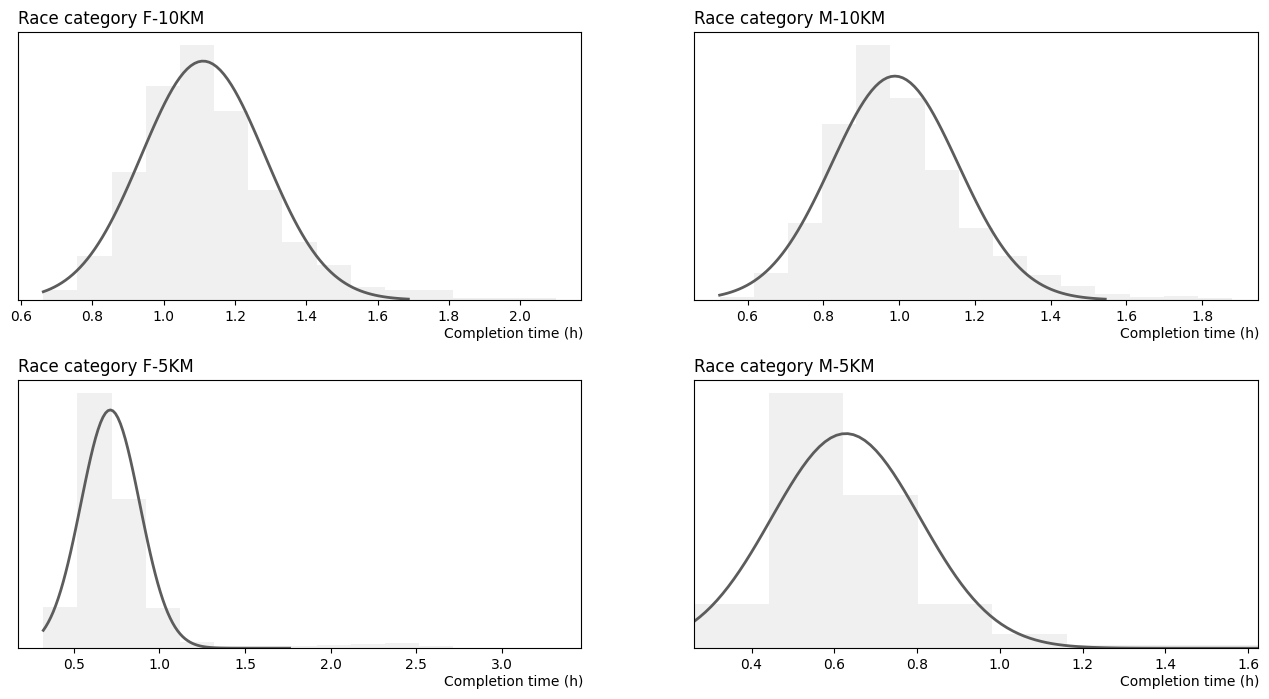

In [25]:
fig, ax = plt.subplots(2, 2, figsize=(16,8))

# Data slicers
genders = ['F', 'M', 'F', 'M']
dist_nums = [10, 10, 5, 5]

for i in range(0,4):
    
    
    # New DataFrame sliced by race
    df_br = df.loc[(df.gender == genders[i]) & (df.dist_num == dist_nums[i])]
    values = df_br.time_h.values

    # Plotting histogram
    ax.flat[i].hist(values, bins=15, color='#F0F0F0', density=True)
    
    # Removing outliers
    z_scores = np.abs(zscore(df_br['time_h']))
    threshold = 3
    df_br = df_br[z_scores <= threshold]
    values = df_br.time_h.values
    print(f'Categoria: {genders[i]}-{dist_nums[i]} / Média (h) {np.mean(values):.2f} / Mediana (h) {np.median(values):.2f}')

    # Normal distribuition params
    mean, std = norm.fit(values)
    xmin = values.min()
    xmax = values.max() #values.max()
    plt.xlim(xmin, xmax)
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mean, std)

    # Plotting normal distribuition
    ax.flat[i].plot(x, p, color='#5C5C5C', linewidth=2)
    
    ax.flat[i].set_title(f'Race category {genders[i]}-{dist_nums[i]}KM', loc='left')
    
    ax.flat[i].tick_params(axis='y', which='both', left=False, labelleft=False)
    
    ax.flat[i].set_xlabel('Completion time (h)')
    
    ax.flat[i].xaxis.set_label_coords(0.88, -0.1)
    
    plt.subplots_adjust(hspace = 0.3)

plt.show()

##### Creating table of normal distribuition

In [11]:
# Data slicers
nums = df.num.values

results = {
    'x' : [],
    'p' : [],
    'p_filtered' : [],
    'num' :[]
}

for num in nums:
    
    gender = df.loc[df.num == num].gender.values[0]
    dist_num = df.loc[df.num == num].dist_num.values[0]
    time_h = df.loc[df.num == num].time_h.values[0]
    
    # New DataFrame sliced by race category
    df_br = df.loc[(df.gender == gender) & (df.dist_num == dist_num)]
    z_scores = np.abs(zscore(df_br['time_h']))
    threshold = 3
    df_br = df_br[z_scores <= threshold]
    values = df_br.time_h.values
    
    mean, std = norm.fit(values)
    xmin = 0
    xmax = 3 #values.max()
    x = np.linspace(xmin, xmax, 500)
    p = norm.pdf(x, mean, std)
    
    for i, xs in enumerate(x):
        # Storing values in a dictionary
        results['x'].append(x[i])
        results['p'].append(p[i])
        results['p_filtered'].append(p[i] if xs <= time_h else 0)
        results['num'].append(num)

# Creating DataFrame
#df_nd = pd.DataFrame(results)
#results


##### Creating features of pace and speed

In [12]:
from datetime import datetime, timedelta

start_datetime = datetime(1900, 1, 1)  # midnight 1st January 1900

def from_ordinal(ordinal, start_datetime=start_datetime):
    return start_datetime + timedelta(hours=ordinal)

df['pace_h'] = (df.time_h / df.dist_num)
df.pace_h = df.pace_h.apply(lambda x: from_ordinal(x)).dt.time

In [13]:
df.pace_h

1        00:03:58.500000
2        00:04:15.100000
3        00:04:25.300000
4        00:04:27.600000
5        00:04:31.400000
              ...       
11345    00:32:29.600000
11346           00:33:06
11347    00:33:23.600000
11348    00:35:27.800000
11349    00:35:33.400000
Name: pace_h, Length: 11346, dtype: object

In [14]:
df_nd = pd.DataFrame(results)

In [15]:
# results_path = os.path.join(get_parent(file_path, 1), 'data\\2024')
# df.to_csv(results_path + '\\athletes.csv', sep=';', decimal=',', index=False)
# df_nd.to_csv(results_path + '\\normal_dist.csv', sep=';', decimal=',', index=False)